In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
%matplotlib inline

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### Data Dictionary ### 

Variable | Definition | Key
:---:|:---:|:---:
survival | Survival | 0 = No, 1 = Yes
pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
sex | Sex	
Age | Age |in years	
sibsp | # of siblings / spouses aboard the Titanic	
parch | # of parents / children aboard the Titanic	
ticket | Ticket number	
fare | Passenger fare	
cabin | Cabin number	
embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### PassengerID
> This column is used as an index column.  We will not use this column in our model.

***

### Survived ###
> This column is the Target(y) values.
- Values are nominal/binary.
- 0 = Not Survive
- 1 = Did Survive

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:>

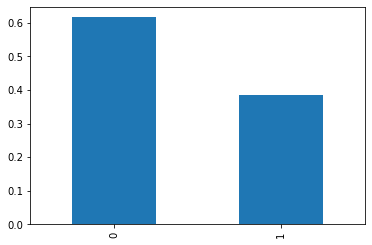

In [131]:
print(train_data.Survived.value_counts())
train_data.Survived.value_counts(normalize=True).plot(kind='bar')

***

### Pclass ###
> Ticket Class
 - Values are ordinal in type.
 - 1 = First Class Ticket
 - 2 = Second Class Ticket
 - 3 = Third Class Ticket
 <br>  
 Will have to OneHotEncode values.

In [132]:
train_data.Pclass.describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

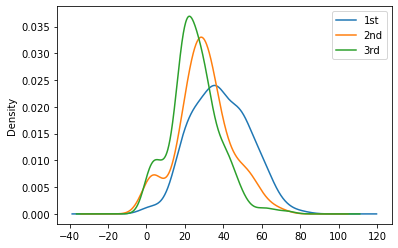

In [13]:
for x in [1,2,3]:
    train_data.Age[train_data.Pclass == x].plot(kind='kde')
plt.legend(('1st', '2nd', '3rd'))

In [18]:
train_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

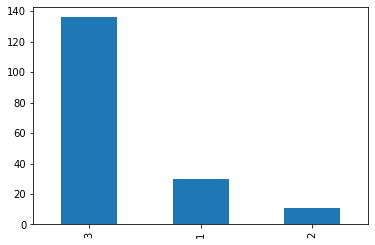

In [62]:
missing_ages = train_data.loc[train_data.Age.isna()]
missing_ages.Pclass.value_counts().plot(kind='bar')

In [22]:
train_data.Cabin.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [64]:
train_data.Embarked.isna().sum()

2

**Will drop 'Cabin' column due to too data being indecernable.**

In [88]:
full_train = train_data.drop('Cabin', axis=1)
full_train.dropna(subset=['Embarked'], axis=0, inplace=True)
median = train_data.Age.median()
full_train.Age.fillna(median, inplace=True)

In [69]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Survived'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

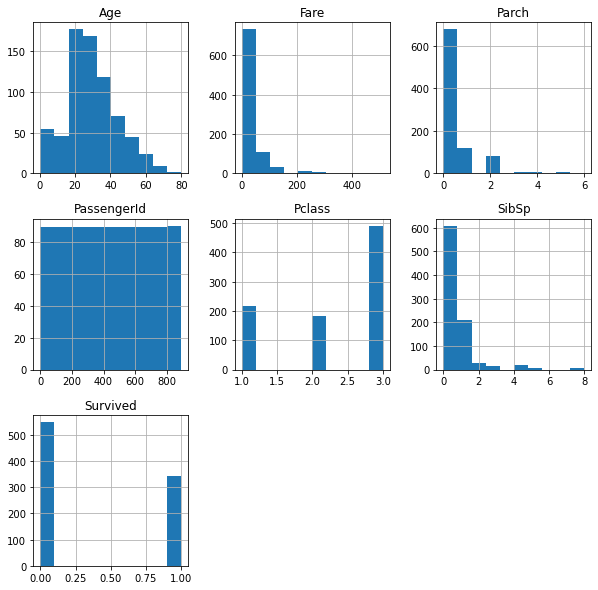

In [8]:
train_data.hist(figsize=(10,10))

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Fare'>,
        <AxesSubplot:xlabel='Survived', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Age', ylabel='Parch'>,
        <AxesSubplot:xlabel='Fare', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', ylabel='Parch'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Parch'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Parch'>,
        <AxesSubplot:xlabel='Survived', ylabel='Parch'>],
       [<AxesSubplot:xlabel='Age', ylabe

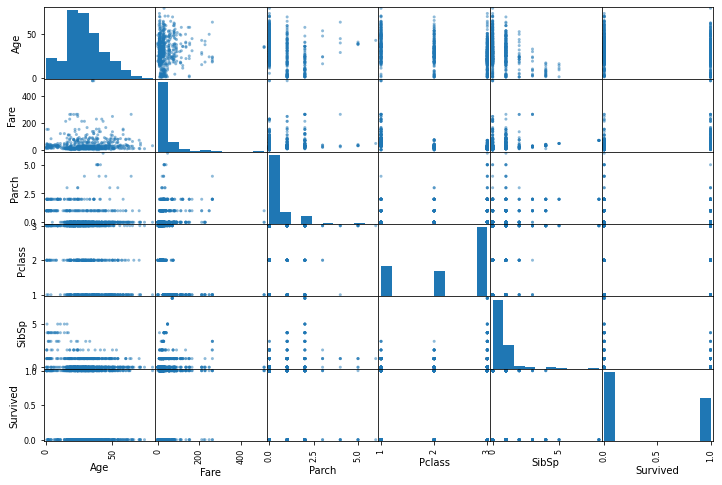

In [9]:
from pandas.plotting import scatter_matrix
numeric = ['Age', 'Fare', 'Parch','Pclass', 'SibSp','Survived']
scatter_matrix(train_data[numeric], figsize=(12,8))

<AxesSubplot:>

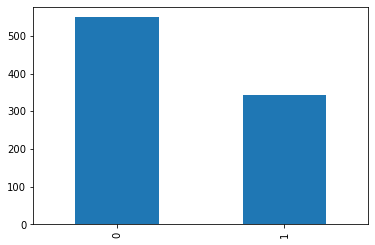

In [10]:
train_data.Survived.value_counts().plot(kind='bar')

<AxesSubplot:>

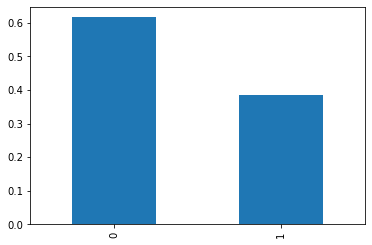

In [11]:
train_data.Survived.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

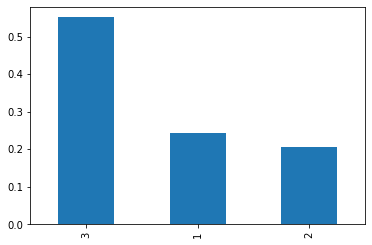

In [12]:
train_data.Pclass.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

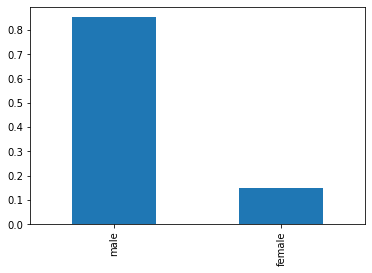

In [14]:
train_data.Sex[train_data.Survived == 0].value_counts(normalize=True) \
.plot(kind='bar')

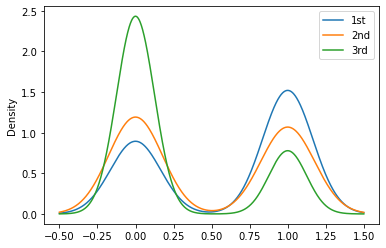

In [15]:
for x in [1,2,3]:
    train_data.Survived[train_data.Pclass == x].plot(kind='kde')
plt.legend(('1st','2nd','3rd'))

<AxesSubplot:>

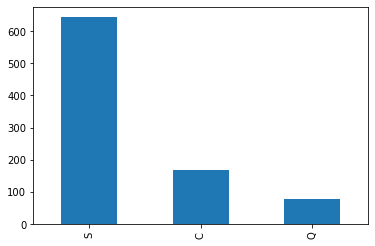

In [16]:
train_data.Embarked.value_counts().plot(kind='bar')

In [71]:
full_train.Ticket.describe()

count      889
unique     680
top       1601
freq         7
Name: Ticket, dtype: object

In [74]:
full_train.Ticket.value_counts()

1601                7
347082              7
CA. 2343            7
347088              6
3101295             6
                   ..
349246              1
370372              1
SOTON/OQ 3101316    1
113794              1
348121              1
Name: Ticket, Length: 680, dtype: int64

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, preprocessing

In [97]:
y = full_train['Survived']
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Age']
X = pd.get_dummies(full_train[features])
X_test = pd.get_dummies(test_data[features])

rForest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rForest_model.fit(X,y)
print(model.score)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('RandomForestClassifier.csv')

In [99]:
rForest_model.score(X, y)

0.8143982002249719

In [115]:
X = full_train[['Pclass', 'Age', 'Fare', 'Embarked', 'Sex', 'SibSp', 'Parch']].values
X = pd.get_dummies(full_train[features])
X_test = pd.get_dummies(test_data[features])

classifier = linear_model.LogisticRegression()

log_model = classifier.fit(X, y)
print(log_model.score(X,y))

poly = preprocessing.PolynomialFeatures()
poly_features = poly.fit_transform(X)

poly_model = classifier.fit(poly_features,y)
print(poly_model.score(poly_features,y))

0.7997750281214848
0.8098987626546682


C:\Users\Brian\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [122]:
poly_info = pd.DataFrame(poly_features)

In [123]:
poly_info.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,3.0,1.0,0.0,0.0,1.0,9.0,3.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,3.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
